In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data_path = "/home/victor/Datasets/ml/challenge/"
TEST_SIZE = 0.25

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor, RANSACRegressor, BayesianRidge, Ridge, Lasso, ElasticNet, TheilSenRegressor
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
df_train = pd.read_csv(os.path.join(data_path, "prices_train.csv"))
df_test = pd.read_csv(os.path.join(data_path, "prices_test.csv"))

In [6]:
df_train

,Unnamed: 0,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2013.083,34.0,157.6052,7.0,24.96628,121.54196,39.1
1,1,2013.500,13.3,561.9845,5.0,24.98746,121.54391,54.8
2,2,2012.917,13.7,1236.5640,1.0,24.97694,121.55391,30.6
3,3,2013.500,8.5,104.8101,5.0,24.96674,121.54067,55.5
4,4,2013.500,13.2,1164.8380,NaN,24.99156,121.53406,34.3
...,...,...,...,...,...,...,...,...
326,326,2013.417,38.5,216.8329,7.0,24.98086,121.54162,41.0
327,327,2013.417,9.7,421.4790,5.0,24.98246,121.54477,49.3
328,328,2012.750,0.0,208.3905,6.0,24.95618,121.53844,44.0
329,329,2013.167,16.2,2288.0110,3.0,24.95885,121.51359,24.4


### Analyse Train

In [7]:
df_train = df_train.drop(columns=['Unnamed: 0'])

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     331 non-null    float64
 1   X2 house age                            323 non-null    float64
 2   X3 distance to the nearest MRT station  324 non-null    float64
 3   X4 number of convenience stores         317 non-null    float64
 4   X5 latitude                             331 non-null    float64
 5   X6 longitude                            331 non-null    float64
 6   Y house price of unit area              331 non-null    float64
dtypes: float64(7)
memory usage: 18.2 KB


In [9]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(43)

,column_name,percentage
3,X4 number of convenience stores,4.229607
1,X2 house age,2.416918
2,X3 distance to the nearest MRT station,2.114804
0,X1 transaction date,0.000000
4,X5 latitude,0.000000
5,X6 longitude,0.000000
6,Y house price of unit area,0.000000


In [10]:
feature_columns = df_train.drop(columns=["Y house price of unit area"]).columns
target_column = ["Y house price of unit area"]

In [11]:
model = LinearRegression()

X = df_train.dropna().drop(columns=target_column)
y = df_train.dropna()[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

model.fit(X_train, y_train)

mean_squared_error(model.predict(X_test), y_test)

np.float64(75.63798846585763)

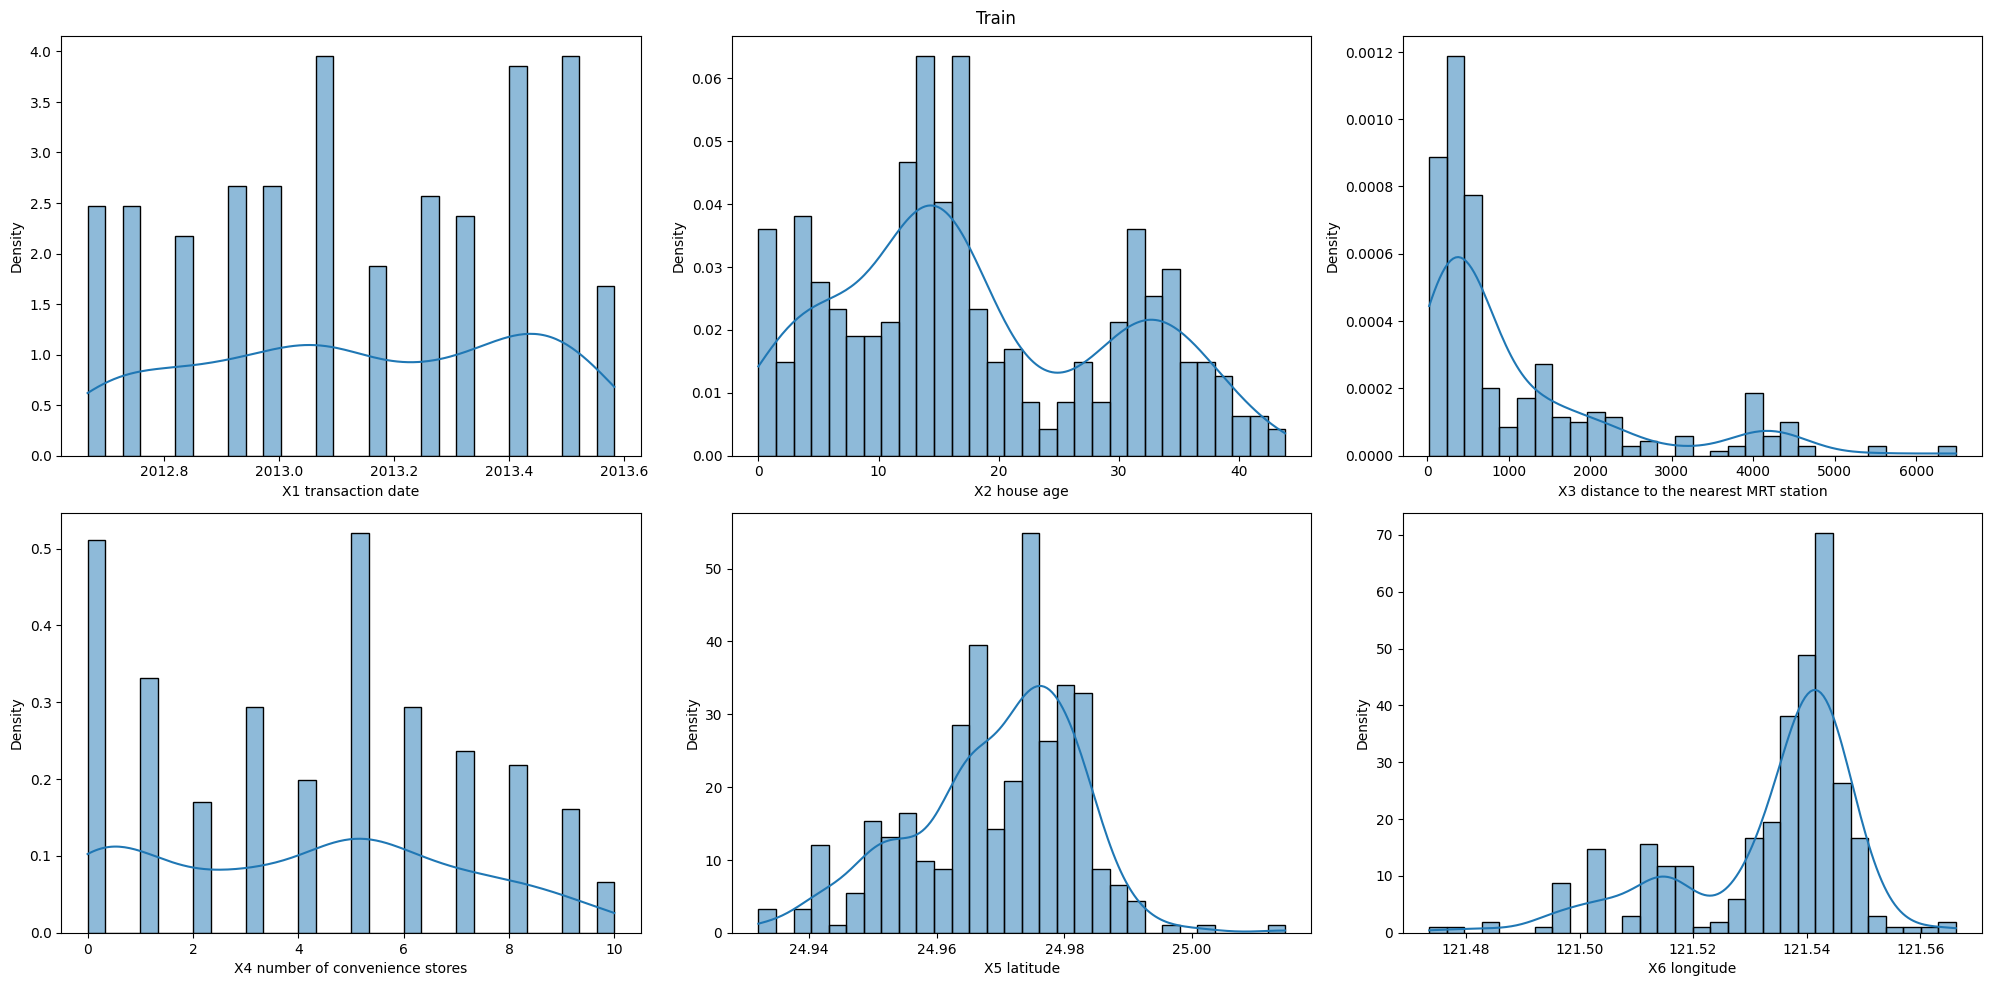

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 30

for idx, column in enumerate(feature_columns):
    ax = axes_flattened[idx]
    sns.histplot(data=df_train,
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.suptitle("Train") 
fig.tight_layout(pad=1.0)

<Axes: xlabel='Y house price of unit area', ylabel='Density'>

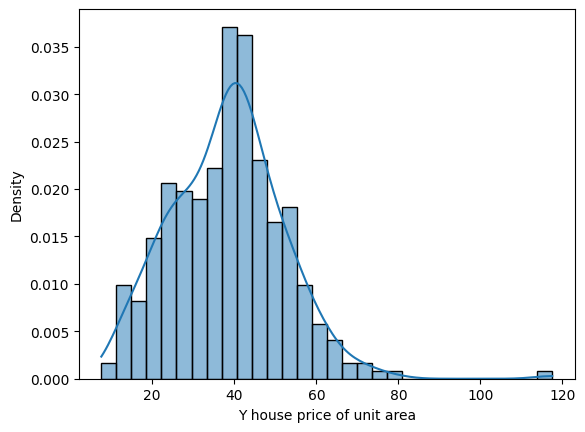

In [13]:
sns.histplot(data=df_train, x=target_column[0], bins=bins,stat='density', kde=True)

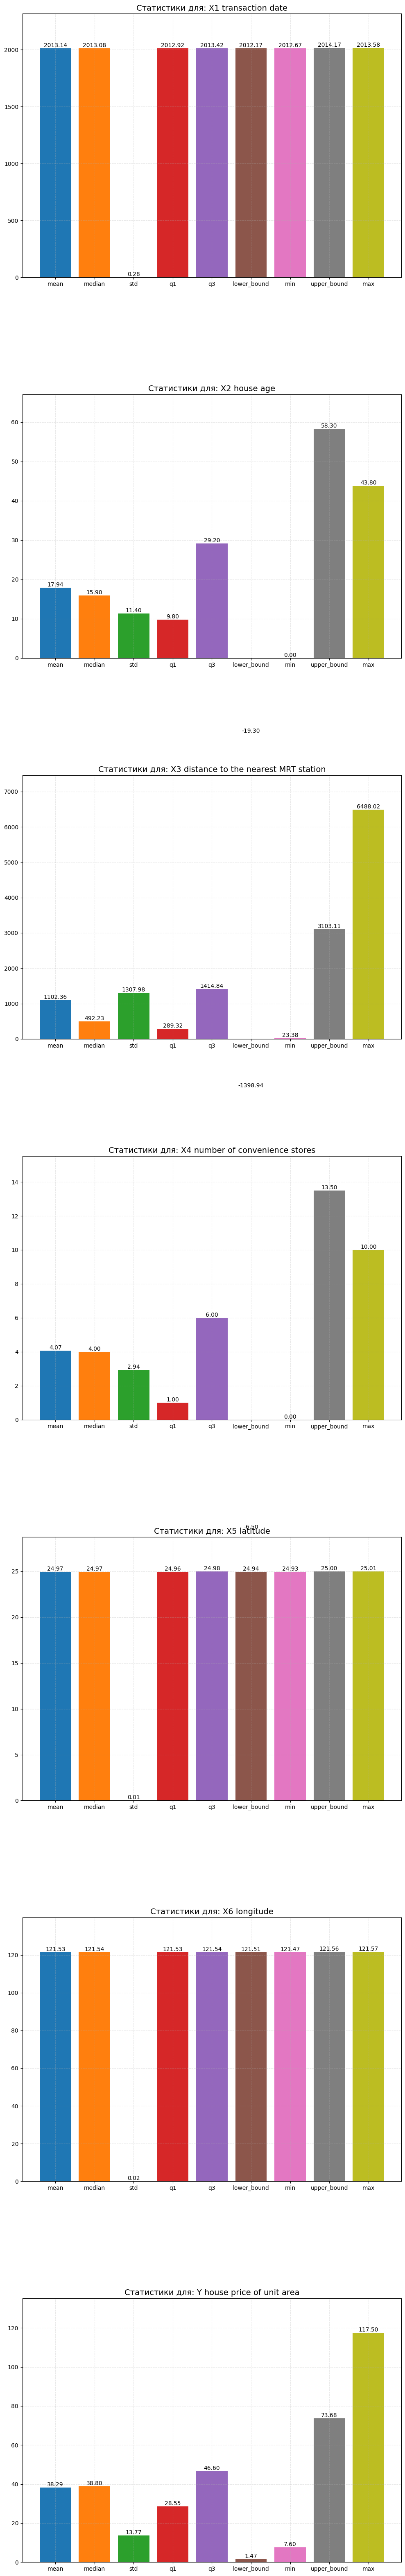

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
mean,2013.140994,17.937461,1102.361277,4.072555,24.969130,121.533612,38.293958
median,2013.083000,15.900000,492.231300,4.000000,24.972130,121.539130,38.800000
std,0.281801,11.396095,1307.975099,2.938898,0.012901,0.015444,13.766246
q1,2012.917000,9.800000,289.324800,1.000000,24.962990,121.529665,28.550000
q3,2013.417000,29.200000,1414.837000,6.000000,24.978440,121.543385,46.600000
lower_bound,2012.167000,-19.300000,-1398.943500,-6.500000,24.939815,121.509085,1.475000
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
upper_bound,2014.167000,58.300000,3103.105300,13.500000,25.001615,121.563965,73.675000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [14]:
stats_names = ["mean", "median", "std", "q1", "q3", 'lower_bound', 'min', 'upper_bound', 'max']

stats_df = dict.fromkeys(df_train.columns)

for col in df_train.columns:
    data = df_train.dropna(subset=col)[col]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    stats_df[col] = [df_train[col].mean(),
                               df_train[col].median(),
                               df_train[col].std(),
                               df_train[col].quantile(0.25),
                               df_train[col].quantile(0.75),
                               lower_bound,
                               data.min(),
                               upper_bound,
                               data.max()]

stats_df = pd.DataFrame(stats_df, index=stats_names)

fig, axes = plt.subplots(nrows=len(df_train.columns), figsize=(10, 9*len(df_train.columns)))
colors = plt.cm.tab10.colors
for ax, (col_name, values) in zip(axes, stats_df.items()):
    bars = ax.bar(stats_names, values, color=colors)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')
        
    ax.set_title(f'Статистики для: {col_name}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(0, max(values) * 1.15)
plt.tight_layout()
plt.show()
stats_df

**Вывод:** Необходимо попытатсья как-то поработать выбросы `X3`, max сильно отличается от upper_bound, к тому же исходя из распределения `X3` этот параметр может быть оцень важен. Можно попробоватаь добавить параметр `long distances` с параметрами 0 и 1. Это также может нам помочь заполнить отсутствующие значения.

Отсутствующие значения в остальных столбцах можно смело запонлять медианой

In [15]:
model = LinearRegression()

data = df_train.copy()

for col in ['X1 transaction date', 'X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']:
    data[col] = data[col].fillna(data[col].mean())

Q1 = np.percentile(data['X3 distance to the nearest MRT station'], 25)
Q3 = np.percentile(data['X3 distance to the nearest MRT station'], 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
    
data = data.dropna()

data['X7 long distance to the nearest MRT station'] = (df_train['X3 distance to the nearest MRT station'] > upper_bound)

X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

model.fit(X_train, y_train)

mean_squared_error(model.predict(X_test), y_test)

np.float64(103.58280870201583)

<Axes: >

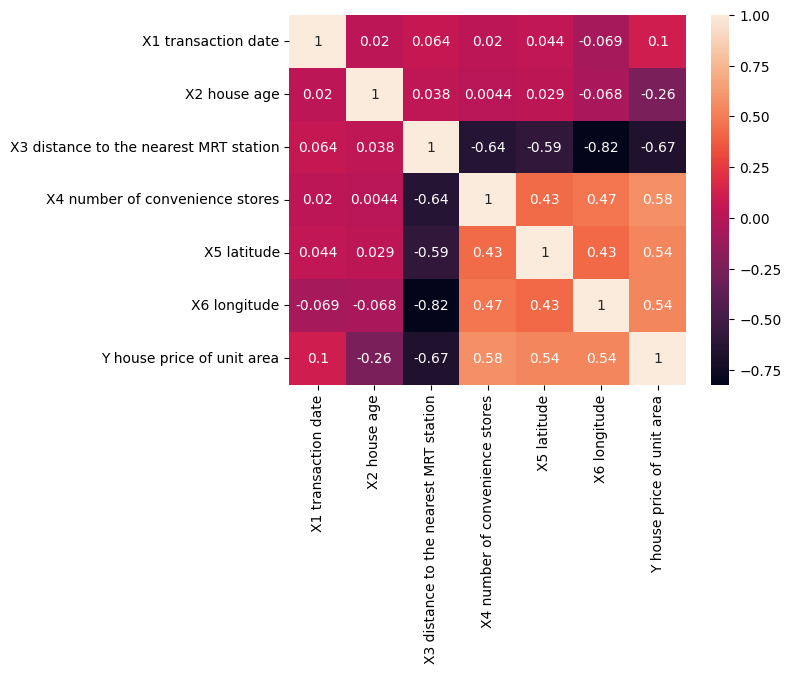

In [16]:
sns.heatmap(df_train.corr(), annot=True)

X3 distance to the nearest MRT station X4 number of convenience stores corr: -0.6405791131244252
X3 distance to the nearest MRT station X5 latitude corr: -0.5873495706870732
X3 distance to the nearest MRT station X6 longitude corr: -0.8222799863140737
X4 number of convenience stores X5 latitude corr: 0.4338580251271571
X4 number of convenience stores X6 longitude corr: 0.474725023000553
X5 latitude X6 longitude corr: 0.4265380995135895


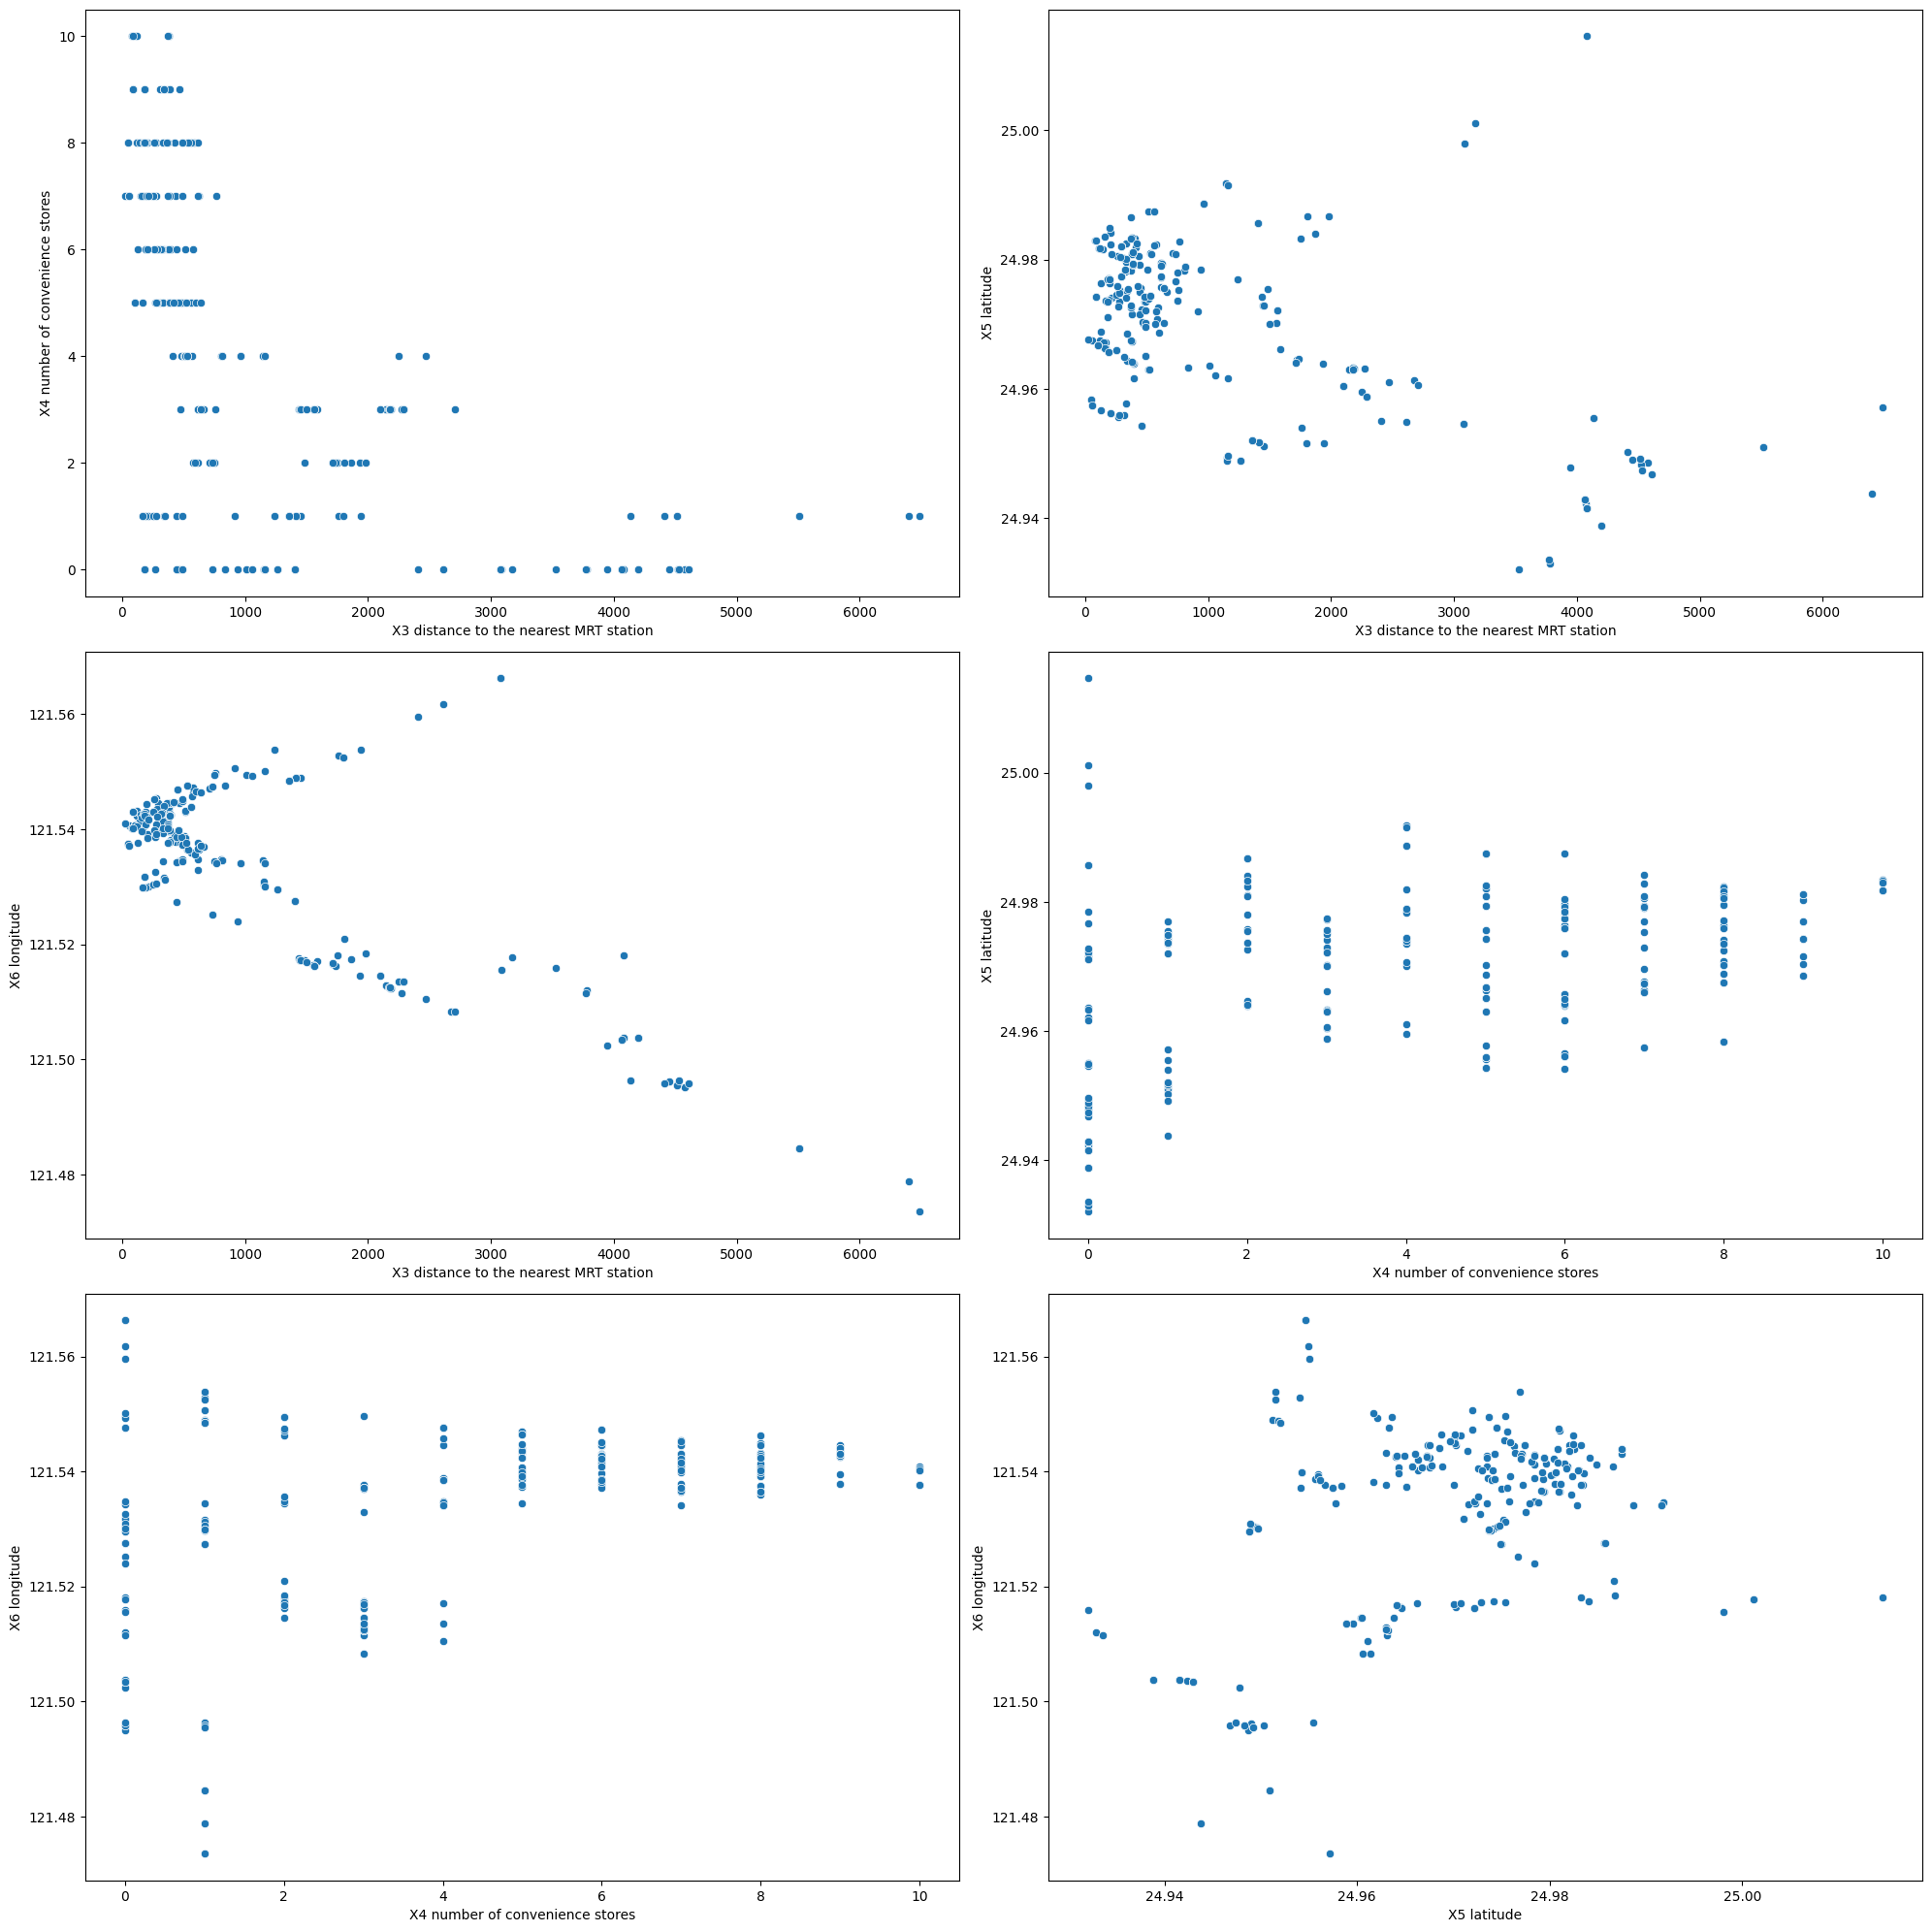

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

i = -1
for idx_1, col_name_1 in enumerate(feature_columns):
    for idx_2, col_name_2 in enumerate(feature_columns):
        if idx_2 <= idx_1:
            continue
        
        correlation = df_train[[col_name_1, col_name_2]].corr().iloc[0, 1]
        
        if abs(correlation) < 0.1:
            continue
        
        i += 1
        ax = axes_flattened[i]
        
        print(col_name_1, col_name_2, f"corr: {correlation}")
        sns.scatterplot(
            x=col_name_1,
            y=col_name_2,
            data=df_train.dropna(subset=[col_name_1, col_name_2]),
            ax=ax,
        )  

fig.tight_layout(pad=1.0)
plt.show()

X1 transaction date corr: 0.10326962434672116
X2 house age corr: -0.2564595009154065
X3 distance to the nearest MRT station corr: -0.6727355152205059
X4 number of convenience stores corr: 0.5751606177822669
X5 latitude corr: 0.5419815133234379
X6 longitude corr: 0.5381711940820489


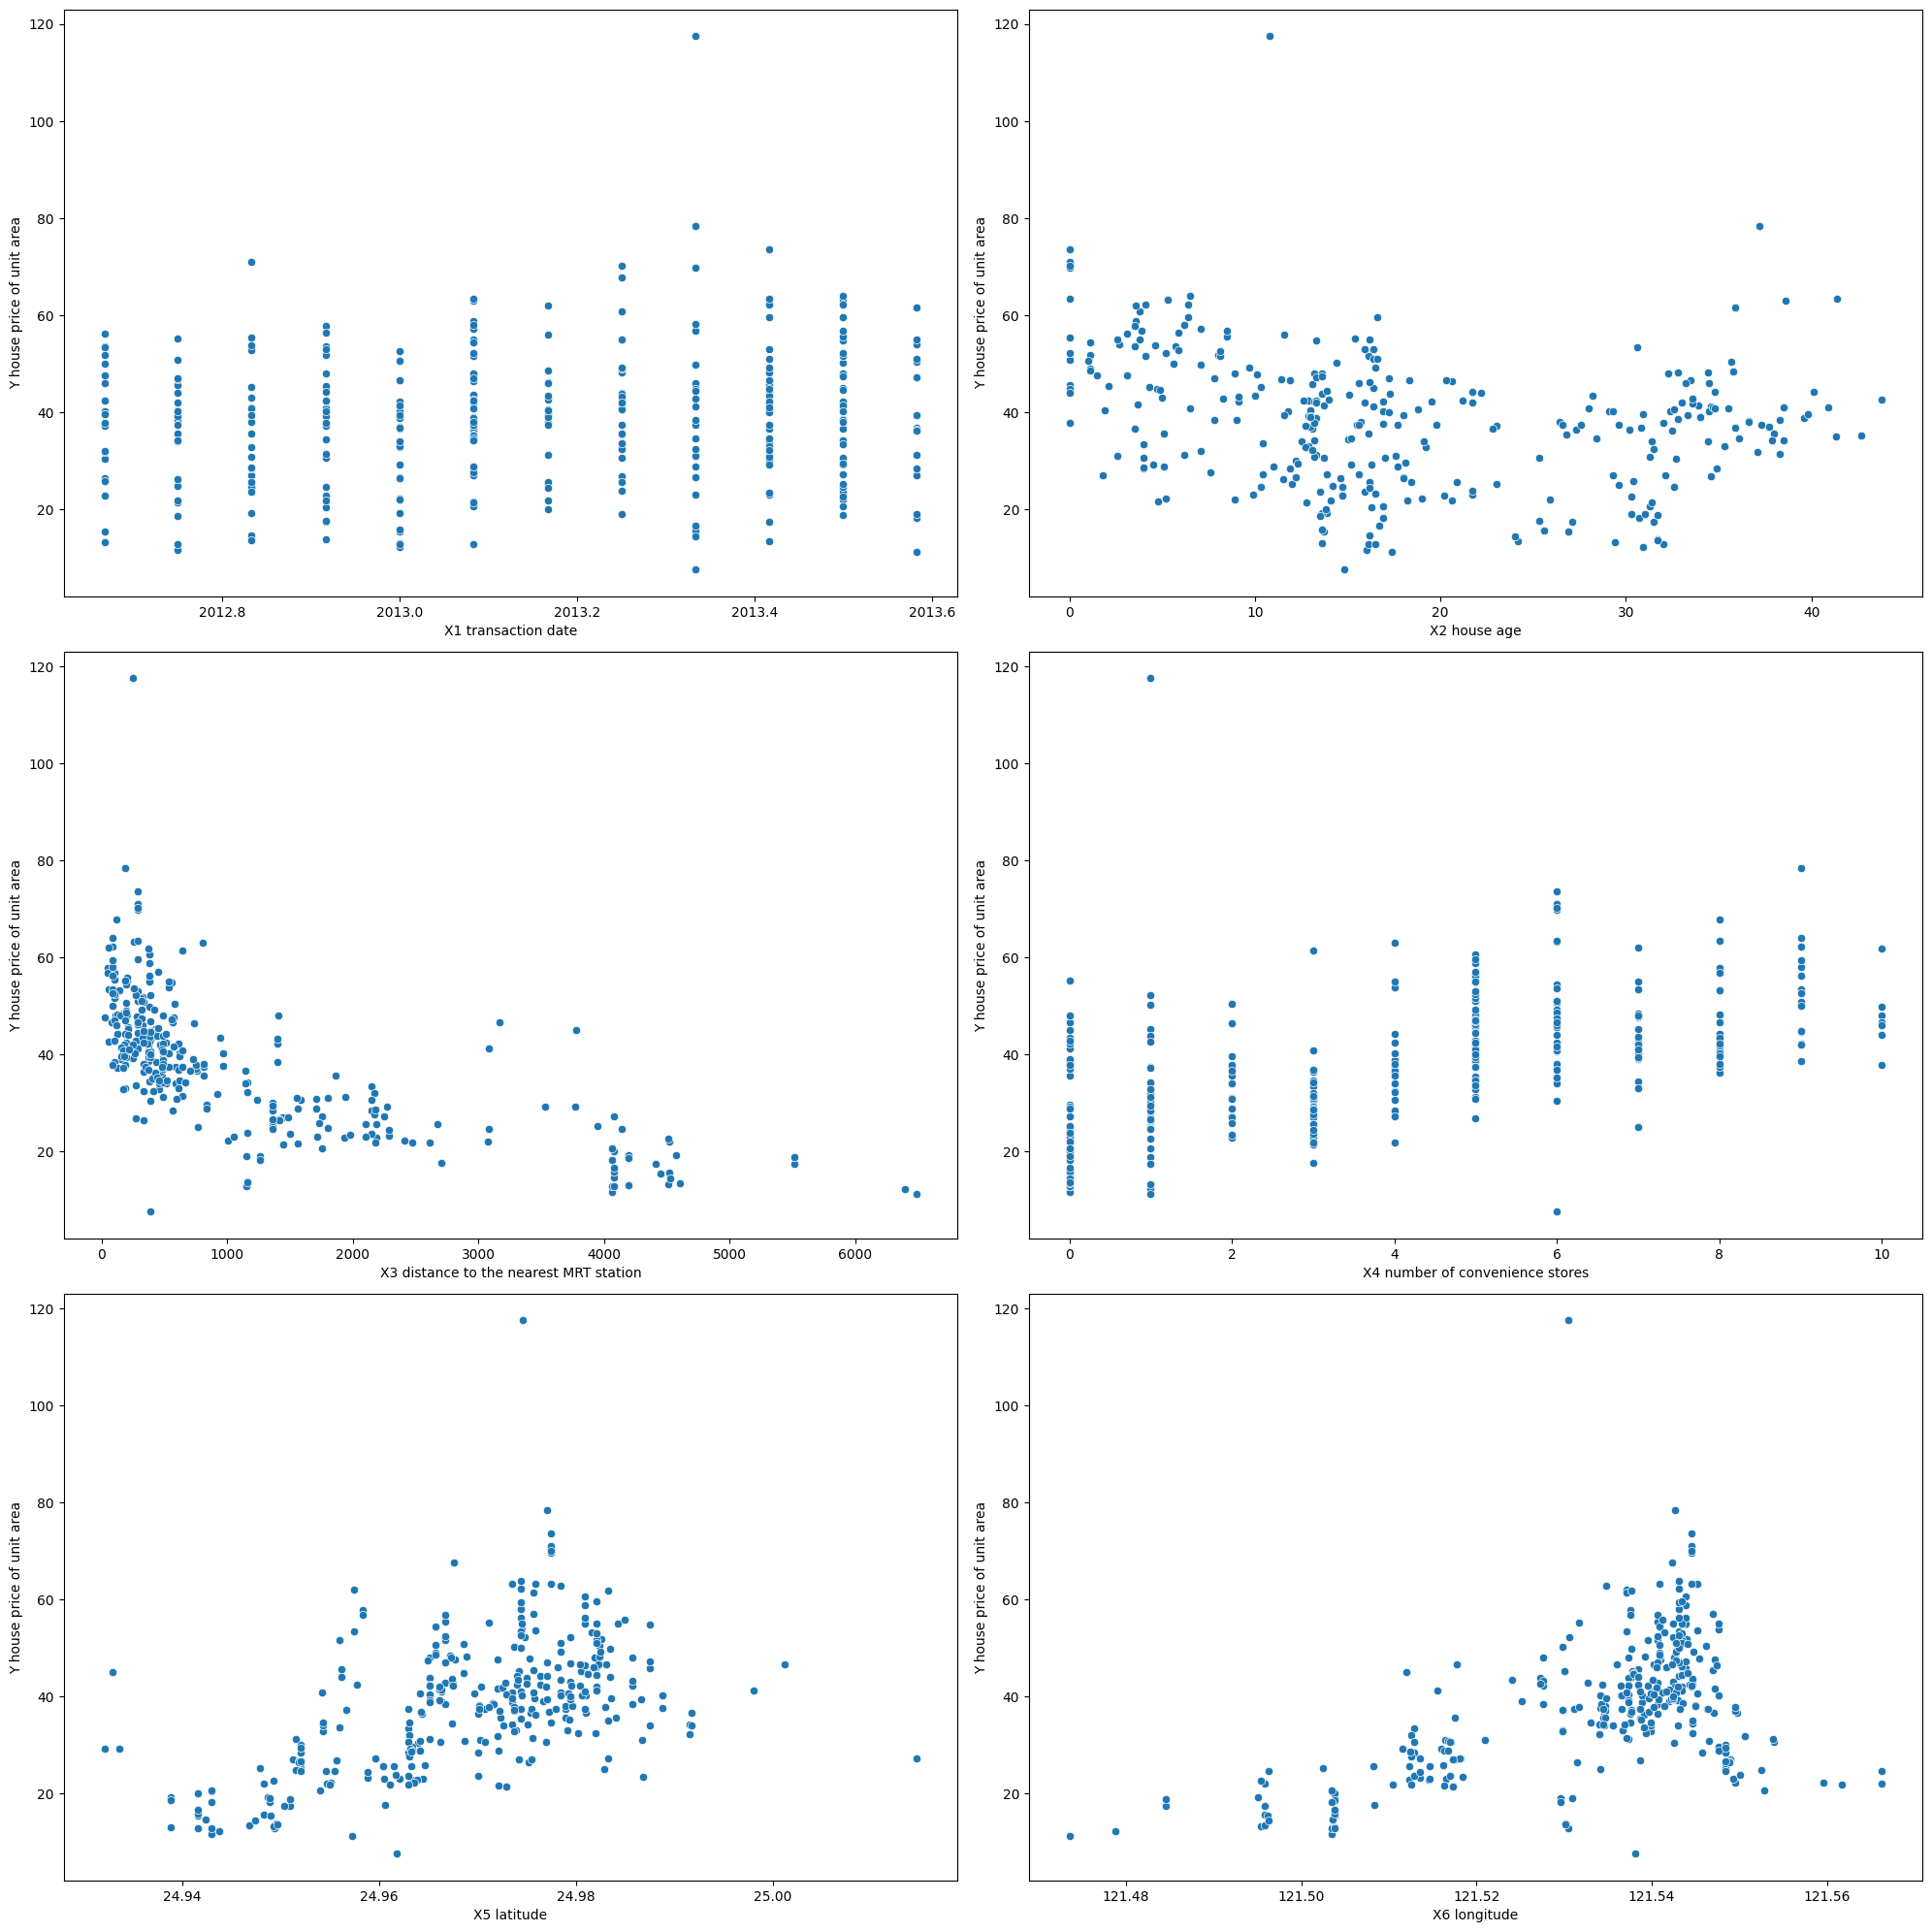

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

i = -1
for idx_1, col_name_1 in enumerate(feature_columns):
    
    correlation = df_train[[col_name_1, target_column[0]]].corr().iloc[0, 1]
    
    i += 1
    ax = axes_flattened[i]
    
    print(col_name_1, f"corr: {correlation}")
    sns.scatterplot(
        x=col_name_1,
        y=target_column[0],
        data=df_train.dropna(subset=[col_name_1, target_column[0]]),
        ax=ax,
    )  

fig.tight_layout(pad=1.0)
plt.show()

In [19]:
def train_poly_linear_model(X, y, degree: int) -> np.float64:
    model = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree)
    
    if isinstance(X, pd.DataFrame):
        X_values = X.values
    elif isinstance(X, pd.Series):
        X_values = X.values.reshape(-1, 1)
    else:
        X_values = np.array(X).reshape(-1, 1) if X.ndim == 1 else np.array(X)
        
        
    X_poly = poly_features.fit_transform(X_values)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=TEST_SIZE)
    model.fit(X_train, y_train)
    
    return model, mean_squared_error(model.predict(X_test), y_test)
    # return model, model.score(X_test, y_test)

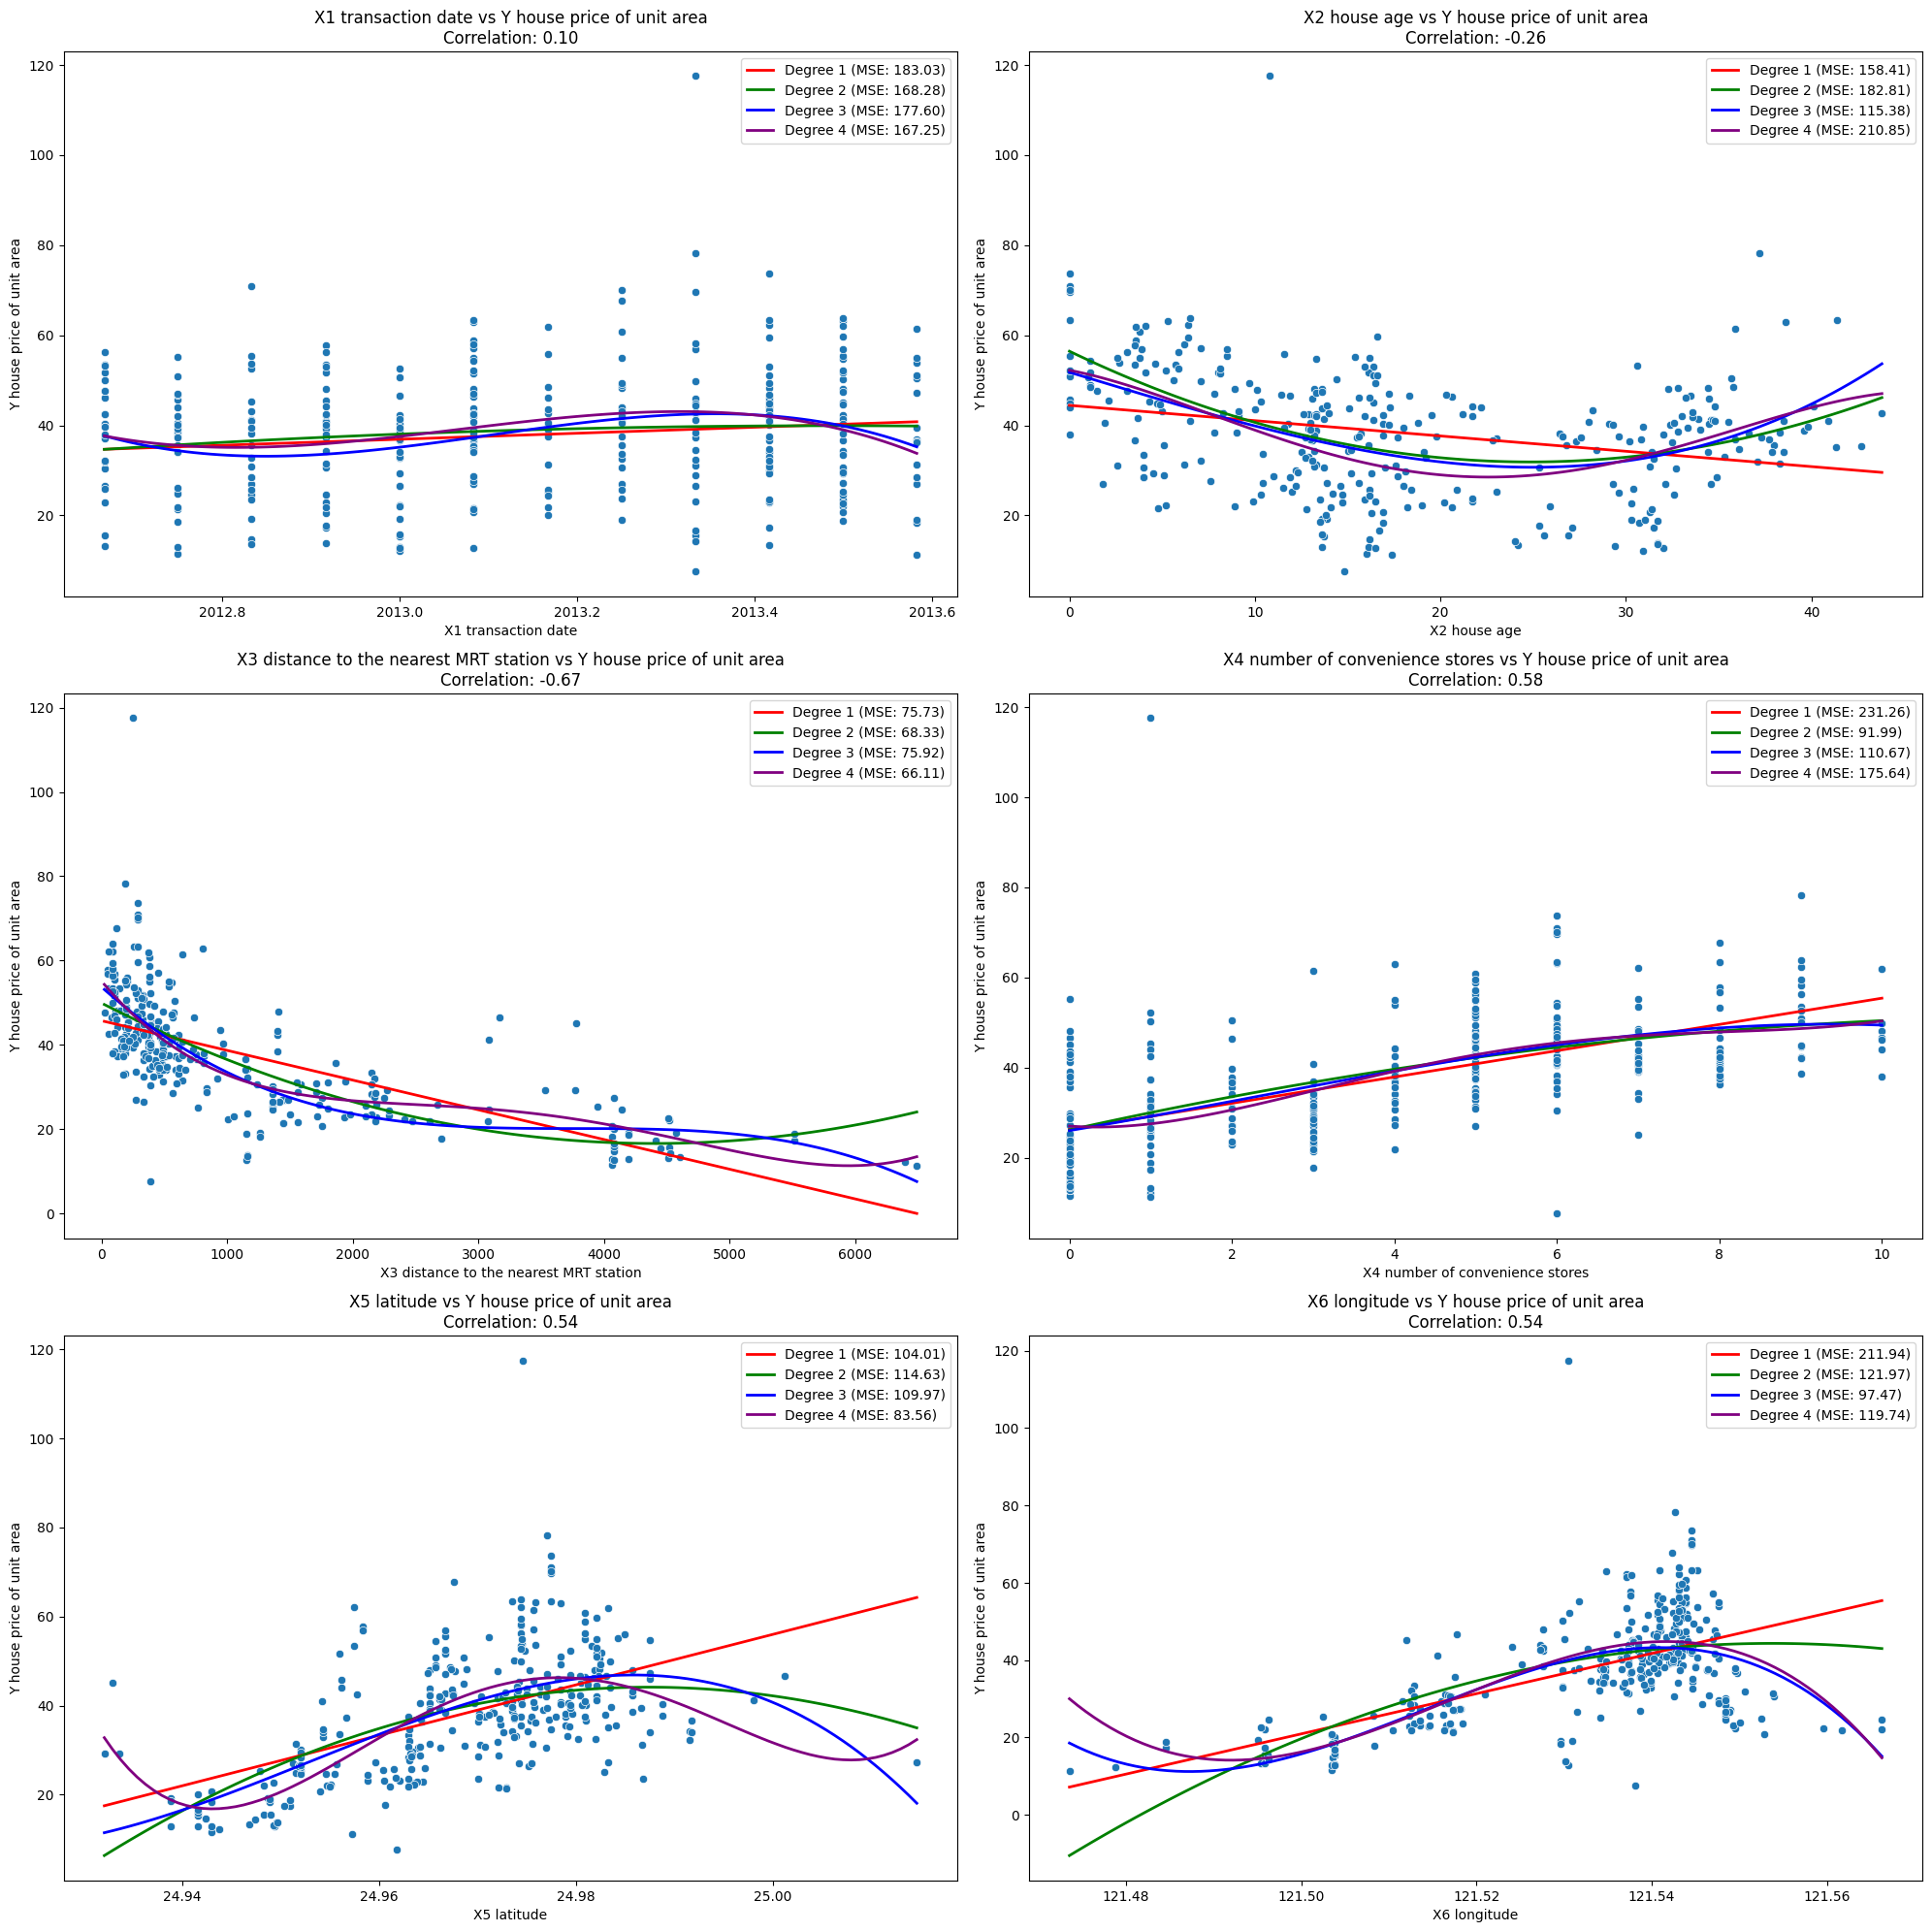

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
1,183.032845,158.406001,75.729054,231.261385,104.007163,211.937150
2,168.279986,182.810717,68.327385,91.989514,114.630895,121.965514
3,177.601103,115.382696,75.922235,110.666264,109.969484,97.469315
4,167.252111,210.851662,66.113294,175.641774,83.560505,119.736299


In [20]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

results = dict.fromkeys(feature_columns)

for idx, col_name in enumerate(feature_columns):
    ax = axes_flattened[idx]
    
    correlation = df_train[[col_name, target_column[0]]].corr().iloc[0, 1]
    
    sns.scatterplot(
        x=col_name,
        y=target_column[0],
        data=df_train.dropna(subset=[col_name, target_column[0]]),
        ax=ax,
    )
    
    data_train = df_train.dropna(subset=[col_name, target_column[0]])
    X = data_train[col_name]
    y = data_train[target_column[0]]
    
    colors = ['red', 'green', 'blue', 'purple']
    
    for degree in [1, 2, 3, 4]:
        model, mse = train_poly_linear_model(X, y, degree)
        
        if degree == 1:
            results[col_name] = []
        results[col_name].append(mse)
        
        x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        x_plot_poly = PolynomialFeatures(degree=degree).fit_transform(x_plot)
        y_plot = model.predict(x_plot_poly)
        
        ax.plot(x_plot, y_plot, color=colors[degree-1], 
                linestyle='-', linewidth=2, 
                label=f'Degree {degree} (MSE: {mse:.2f})')
    
    ax.legend()
    ax.set_title(f'{col_name} vs {target_column[0]}\nCorrelation: {correlation:.2f}')

for i in range(len(feature_columns), len(axes_flattened)):
    axes_flattened[i].axis('off')

fig.tight_layout(pad=1.0)
plt.show()

display(pd.DataFrame(results, index=[1, 2, 3, 4]))

In [21]:
degree=2
X = df_train.dropna()[feature_columns]
y = df_train.dropna()[target_column]
train_poly_linear_model(X, y, degree)[1]

np.float64(128.66230279804506)

In [23]:
import statsmodels.api as sm

scaler = StandardScaler()

model = LinearRegression()

data = df_train.copy()

for col in ['X1 transaction date', 'X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']:
    data[col] = data[col].fillna(data[col].mean())

X = data.dropna()[feature_columns]
y = data.dropna()[target_column]

X_scaled = scaler.fit_transform(X)

X_with_constant = sm.add_constant(X_scaled)
model = sm.OLS(y, X_with_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.590
Model:                                    OLS   Adj. R-squared:                  0.582
Method:                         Least Squares   F-statistic:                     76.04
Date:                        Sat, 05 Apr 2025   Prob (F-statistic):           1.88e-58
Time:                                18:19:23   Log-Likelihood:                -1166.3
No. Observations:                         324   AIC:                             2347.
Df Residuals:                             317   BIC:                             2373.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1713      0.497     76.758      0.000      37.193      39.150
x1             1.6607      0.502      3.308      0.001       0.673       2.648
x2            -3.4016      0.500     -6.809      0.000      -4.384      -2.419
x3            -5.5596      1.089     -5.107      0.000      -7.702      -3.418
x4             3.1326      0.652      4.804      0.000       1.850       4.416
x5             2.8840      0.624      4.621      0.000       1.656       4.112
x6             0.0500      0.887      0.056      0.955      -1.694       1.794
==============================================================================
Omnibus:                      201.325   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3701.588
Skew:                           2.188   Prob(JB):                         0.00
Kurtosis:                      18.970   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

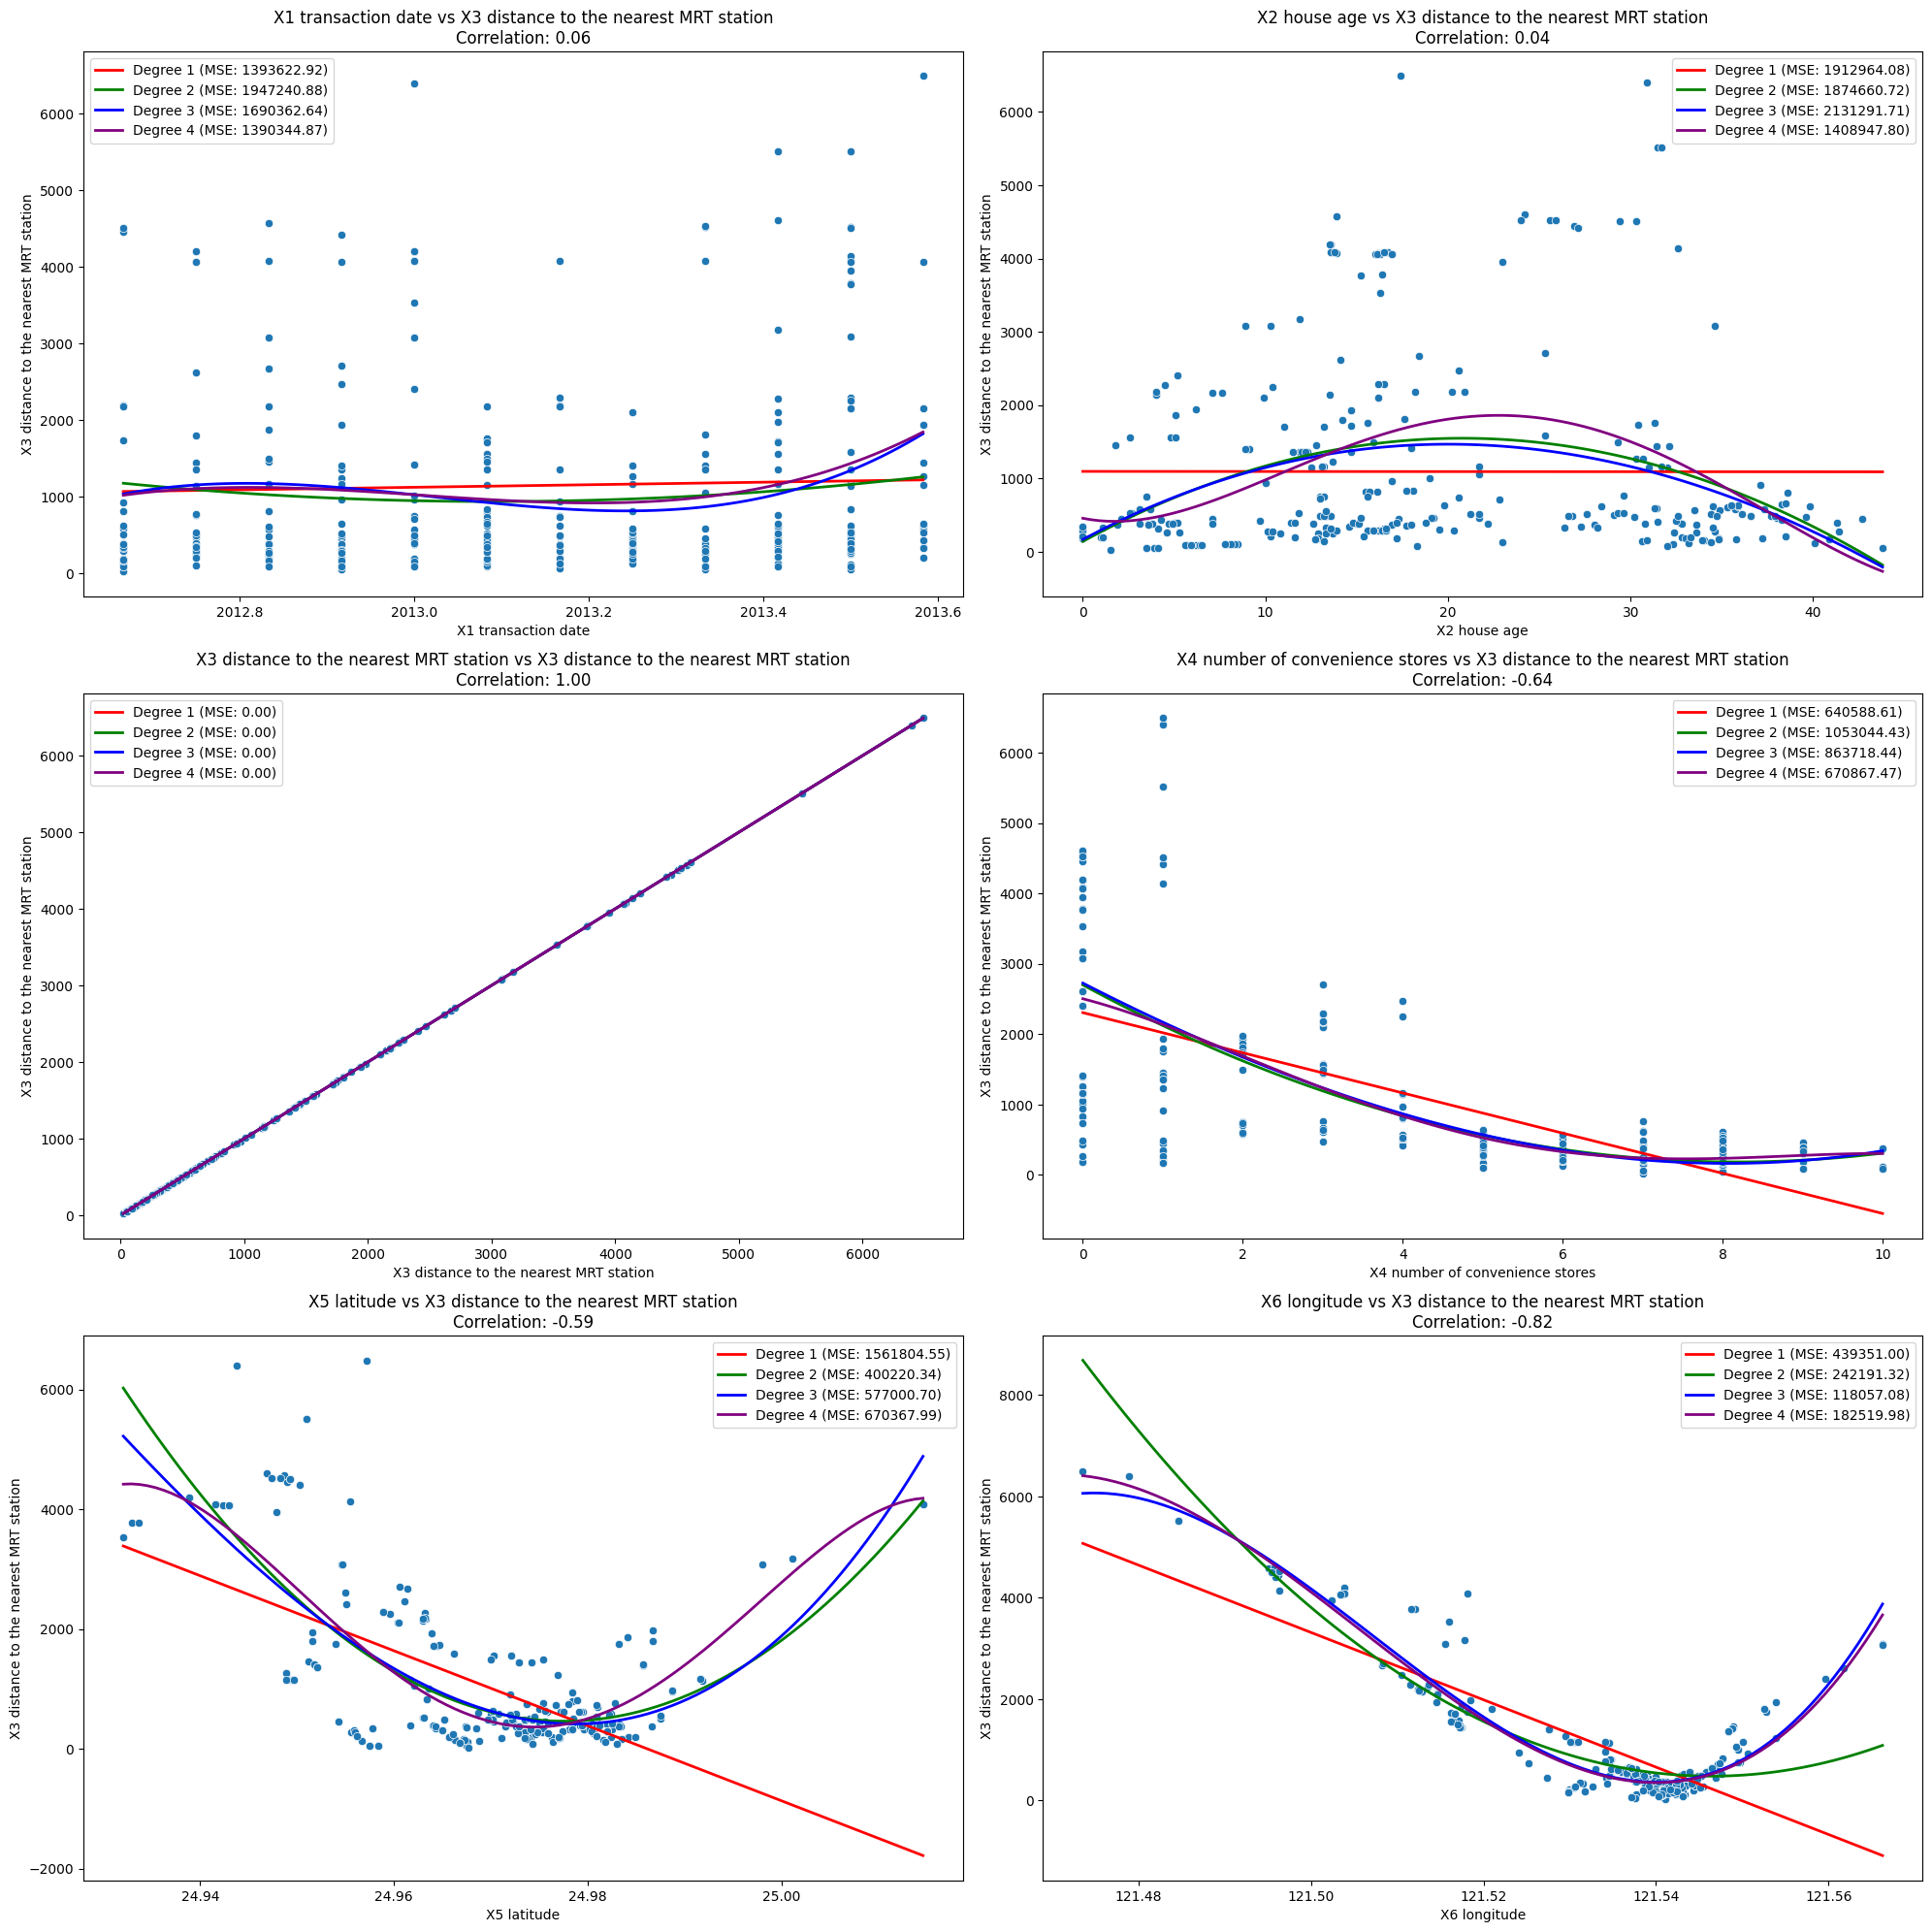

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
1,1.393623e+06,1.912964e+06,7.985039e-25,6.405886e+05,1.561805e+06,439351.004370
2,1.947241e+06,1.874661e+06,4.592400e-20,1.053044e+06,4.002203e+05,242191.323055
3,1.690363e+06,2.131292e+06,5.185920e-12,8.637184e+05,5.770007e+05,118057.083343
4,1.390345e+06,1.408948e+06,2.202924e-04,6.708675e+05,6.703680e+05,182519.980386


In [24]:
target_column = ['X3 distance to the nearest MRT station']

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

results = dict.fromkeys(feature_columns)

for idx, col_name in enumerate(feature_columns):
    ax = axes_flattened[idx]
    
    correlation = df_train[[col_name, target_column[0]]].corr().iloc[0, 1]
    
    sns.scatterplot(
        x=col_name,
        y=target_column[0],
        data=df_train.dropna(subset=[col_name, target_column[0]]),
        ax=ax,
    )
    
    data_train = df_train.dropna(subset=[col_name, target_column[0]])
    X = data_train[col_name]
    y = data_train[target_column[0]]
    
    colors = ['red', 'green', 'blue', 'purple']
    
    for degree in [1, 2, 3, 4]:
        model, mse = train_poly_linear_model(X, y, degree)
        
        if degree == 1:
            results[col_name] = []
        results[col_name].append(mse)
        
        x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        x_plot_poly = PolynomialFeatures(degree=degree).fit_transform(x_plot)
        y_plot = model.predict(x_plot_poly)
        
        ax.plot(x_plot, y_plot, color=colors[degree-1], 
                linestyle='-', linewidth=2, 
                label=f'Degree {degree} (MSE: {mse:.2f})')
    
    ax.legend()
    ax.set_title(f'{col_name} vs {target_column[0]}\nCorrelation: {correlation:.2f}')

for i in range(len(feature_columns), len(axes_flattened)):
    axes_flattened[i].axis('off')

fig.tight_layout(pad=1.0)
plt.show()

display(pd.DataFrame(results, index=[1, 2, 3, 4]))

На основе `X4`, `X5`, `X6` можно попытаться предсказать `X3`

In [25]:
liner_distance = ElasticNet(l1_ratio=0.6)

X = df_train[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].dropna()
y = (df_train['X3 distance to the nearest MRT station'].loc[X.index]).dropna()

X = X.loc[y.index]

train_poly_linear_model(X, y, 1)[1]

np.float64(462858.2356938562)

In [26]:
class Filler(BaseEstimator, TransformerMixin):
    def __init__(self, model_distance: BaseEstimator, degree: int):
        super().__init__()
        self.model_distance = model_distance
        self.poly_distance = PolynomialFeatures(degree=degree)
        self.scaler_distance = StandardScaler()
        self.means = dict.fromkeys([
            'X1 transaction date', 
            'X2 house age', 
            'X4 number of convenience stores', 
            'X5 latitude', 
            'X6 longitude'
        ])
        
    def fit(self, X, y=None):
        X = X.copy()
        X = X.dropna(subset=['X3 distance to the nearest MRT station'])
        
        for col in self.means.keys():
            self.means[col] = X[col].mean()
            X[col] = X[col].fillna(self.means[col])
            
            
        features = ['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
        X_scaled = self.scaler_distance.fit_transform(X[features])
        X_poly = self.poly_distance.fit_transform(X_scaled)
        self.model_distance.fit(X_poly, X['X3 distance to the nearest MRT station'])
        
        return self
    
    def transform(self, X):
        X = X.copy()
        
        for col in self.means.keys():
            X[col] = X[col].fillna(self.means[col])
            
        features = ['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
        mask = X['X3 distance to the nearest MRT station'].isna()
        
        if mask.any():
            X_scaled = self.scaler_distance.transform(X.loc[mask, features])
            X_poly = self.poly_distance.transform(X_scaled)
            predictions = self.model_distance.predict(X_poly)
            X.loc[mask, 'X3 distance to the nearest MRT station'] = predictions
        
        return X

In [27]:
target_column = ['Y house price of unit area']

In [28]:
import statsmodels.api as sm

scaler = StandardScaler()

data = Filler(HuberRegressor(), 1).fit_transform(df_train)

X = data[feature_columns]
y = data[target_column]

X_scaled = scaler.fit_transform(X)

X_with_constant = sm.add_constant(X_scaled)
model = sm.OLS(y, X_with_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.588
Model:                                    OLS   Adj. R-squared:                  0.580
Method:                         Least Squares   F-statistic:                     77.03
Date:                        Sat, 05 Apr 2025   Prob (F-statistic):           1.99e-59
Time:                                18:19:24   Log-Likelihood:                -1190.4
No. Observations:                         331   AIC:                             2395.
Df Residuals:                             324   BIC:                             2421.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2940      0.490     78.116      0.000      37.330      39.258
x1             1.6551      0.495      3.344      0.001       0.681       2.629
x2            -3.3960      0.493     -6.895      0.000      -4.365      -2.427
x3            -5.5227      1.076     -5.132      0.000      -7.640      -3.406
x4             3.0175      0.642      4.703      0.000       1.755       4.280
x5             2.9279      0.614      4.766      0.000       1.719       4.136
x6             0.0721      0.876      0.082      0.934      -1.651       1.795
==============================================================================
Omnibus:                      201.890   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3640.665
Skew:                           2.146   Prob(JB):                         0.00
Kurtosis:                      18.670   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
degree=2
X = df_train[feature_columns]
y = df_train[target_column]

fill = Filler(HuberRegressor(), 1)
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
linear = LinearRegression()
model = make_pipeline(fill, scaler, poly, linear)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(62.726177025495)

In [30]:
X = df_train[feature_columns]
y = df_train[target_column]

In [32]:
models = {
    "HuberRegressor": HuberRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "BayesianRidge": BayesianRidge(),
    "Ridge": Ridge(),
    "Lasso": Lasso(), 
    "ElasticNet": ElasticNet(),
    "LinearRegression": LinearRegression(),
    "TheilSenRegressor": TheilSenRegressor()
}

results = dict.fromkeys(models.keys(), 0.0)

degree=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
medians = dict.fromkeys(X_train.columns)

num_tests = 50

medians = dict.fromkeys(X_train.columns)
for col in X_train.columns:
    medians[col] = X_train[col].median()
    X_train[col] = X_train[col].fillna(medians[col])
    X_test[col] = X_test[col].fillna(medians[col])

for _ in range(num_tests):
    for name, regressor in models.items():
        
        model = make_pipeline(StandardScaler(),
                              PolynomialFeatures(degree=degree),
                              regressor)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] += mean_squared_error(y_pred, y_test)
        
        

    
for name in models.keys():
    results[name] /= num_tests

pd.DataFrame(results, index=['MSE'])


/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/h

,HuberRegressor,RANSACRegressor,BayesianRidge,Ridge,Lasso,ElasticNet,LinearRegression,TheilSenRegressor
MSE,41.634169,291.169134,45.512701,50.327871,49.948064,55.87165,50.782315,65.786002


In [36]:
models = {
    "HuberRegressor": HuberRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "BayesianRidge": BayesianRidge(),
    "Ridge": Ridge(),
    "Lasso": Lasso(), 
    "ElasticNet": ElasticNet(),
    "LinearRegression": LinearRegression(),
    "TheilSenRegressor": TheilSenRegressor()
}

results = dict.fromkeys(models.keys(), 0.0)

degree=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
medians = dict.fromkeys(X_train.columns)

num_tests = 50

for _ in range(num_tests):
    for name, regressor in models.items():
        
        model = make_pipeline(Filler(HuberRegressor(), 1),
                              StandardScaler(),
                              PolynomialFeatures(degree=degree),
                              regressor)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] += mean_squared_error(y_pred, y_test)
        
        

    
for name in models.keys():
    results[name] /= num_tests

pd.DataFrame(results, index=['MSE'])



/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/h

,HuberRegressor,RANSACRegressor,BayesianRidge,Ridge,Lasso,ElasticNet,LinearRegression,TheilSenRegressor
MSE,39.963238,234.192958,43.102042,40.496112,62.433959,67.971374,40.233914,52.667281


In [37]:
class MyRegression(BaseEstimator):
    def __init__(self, regressors: list[BaseEstimator], model: BaseEstimator):
        super().__init__()
        self.regressors = regressors
        self.model = model
        
    def fit(self, X, y):
        
        y_preds = np.zeros((len(self.regressors), X.shape[0]))
        for idx, regressor in enumerate(self.regressors):
            self.regressors[idx] = regressor.fit(X, y)
            y_preds[idx] = regressor.predict(X).reshape(-1)
         
        self.model.fit(y_preds.T, y)
        return self
    
    def predict(self, X):
        y_preds = np.zeros((len(self.regressors), X.shape[0]))
        
        for idx, regressor in enumerate(self.regressors):
            y_preds[idx] = regressor.predict(X).reshape(-1)
            
        return self.model.predict(y_preds.T)
        
        

In [38]:
models = {
    "MyRegression(Huber)": MyRegression(
        [HuberRegressor(),
         TheilSenRegressor(),
         BayesianRidge()],
        HuberRegressor()
    ),
    "MyRegression(All)": MyRegression(
        [HuberRegressor(),
         TheilSenRegressor(),
         BayesianRidge(),
         LinearRegression(),
         ElasticNet(),
         Ridge(),
         Lasso()],
        LinearRegression()
    ),
    "HuberRegressor": HuberRegressor(),
    "TheilSenRegressor":TheilSenRegressor(),
    "Ridge": Ridge(alpha=10.0)
}

results = dict.fromkeys(models.keys(), 0.0)

degree=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
medians = dict.fromkeys(X_train.columns)

num_tests = 50

for _ in range(num_tests):
    for name, regressor in models.items():
        
        model = make_pipeline(Filler(HuberRegressor(), 1),
                              StandardScaler(),
                              PolynomialFeatures(degree=degree),
                              regressor)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] += mean_squared_error(y_pred, y_test)
        
        

    
for name in models.keys():
    results[name] /= num_tests

pd.DataFrame(results, index=['MSE'])



/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/h

,MyRegression(Huber),MyRegression(All),HuberRegressor,TheilSenRegressor,Ridge
MSE,57.217376,63.357533,57.224294,72.538516,60.421868


In [39]:
class Engineering(BaseEstimator, TransformerMixin):
    def __init__(self, lat: float | None = None, lon: float | None = None):
        super().__init__()
        self.mean_lat = lat
        self.mean_lon = lon
        
    def fit(self, X, y=None):
        X = X.copy()
        
        if self.mean_lat is None:
            self.mean_lat = X['X5 latitude'].mean()
            
        if self.mean_lon is None:
            self.mean_lon = X['X6 longitude'].mean()
        
        return self
    
    def transform(self, X):
        X = X.copy()
        
        X['X7 distance to center'] = np.sqrt((X['X5 latitude'] - self.mean_lat)**2 + (X['X6 longitude'] - self.mean_lon)**2)
        X['x8 distance MRT to center'] = np.sqrt((X['X7 distance to center'] - X['X3 distance to the nearest MRT station'])**2)
        
        return X

In [ ]:
models = {
    "MyRegression(Huber)": MyRegression(
        [HuberRegressor(),
         TheilSenRegressor(),
         BayesianRidge()],
        HuberRegressor()
    ),
    "MyRegression(All)": MyRegression(
        [HuberRegressor(),
         TheilSenRegressor(),
         BayesianRidge(),
         LinearRegression(),
         ElasticNet(),
         Ridge(),
         Lasso()],
        LinearRegression()
    ),
    "HuberRegressor": HuberRegressor(),
    "TheilSenRegressor":TheilSenRegressor(),
    "Ridge": Ridge(alpha=10.0)
}

results = dict.fromkeys(models.keys(), 0.0)

degree=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
medians = dict.fromkeys(X_train.columns)

num_tests = 50

for _ in range(num_tests):
    for name, regressor in models.items():
        
        model = make_pipeline(Filler(HuberRegressor(), 1),
                              Engineering(),
                              StandardScaler(),
                              PolynomialFeatures(degree=degree),
                              regressor)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] += mean_squared_error(y_pred, y_test)
        
        

    
for name in models.keys():
    results[name] /= num_tests

pd.DataFrame(results, index=['MSE'])



/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/victor/anaconda3/envs/statistic/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/h

TypeError: unsupported operand type(s) for /=: 'MyRegression' and 'int'

In [ ]:
X = df_train[feature_columns]
y = df_train[target_column]
X_test = df_test.drop(columns=['Unnamed: 0'])

In [ ]:
fill = Filler(HuberRegressor(), 1)
engineer = Engineering()
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)

In [ ]:
linear = Ridge(alpha=10.0)
model = make_pipeline(fill, engineer, scaler, poly, linear)

model.fit(X, y) 

y_pred = model.predict(X_test)


In [ ]:
linear = MyRegression(
    [HuberRegressor(),
     TheilSenRegressor(),
     BayesianRidge()],
    HuberRegressor()
)
model = make_pipeline(fill, engineer, scaler, poly, linear)

model.fit(X, y) 

y_pred = model.predict(X_test)


In [ ]:
results = pd.DataFrame({
    'Y house price of unit area': y_pred.flatten()
}, index=X_test.index)

results.to_csv('predictions.csv', header=True, index_label='index')